# Classifcation Metrics
### A primer

In [67]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,fbeta_score,\
                            roc_curve,roc_auc_score,auc

In [68]:
y = np.random.randint(0,2,10)
y_pred = np.random.randint(0,2,10)

In [69]:
print "Ground truth:",y
print "Predicted   :",y_pred

Ground truth: [0 1 1 0 1 0 1 1 1 0]
Predicted   : [1 1 0 0 1 0 0 1 1 0]


## Accuracy
`Accuracy = ( Σ True positive + Σ True negative ) /Σ Total population`

Accuracy is a common metric for binary classification tasks i.e. when there are two labels. It takes into account the number of correct postive guesses (true positive) and number of correct negative guesses (true negative) and the total number of data points.

In [70]:
def accuracy(y,y_pred):
    """Accuracy = ( Σ True positive + Σ True negative ) /Σ Total population"""
    tp = 0
    tn = 0
    for i in xrange(len(y)):
        if y[i] == 0 and y_pred[i] == 0: # true negative
            tn +=1
        elif y[i] == 1 and y_pred[i] ==1: # true postive
            tn +=1
    acc = (tp + tn)/float(len(y))
    return acc
print accuracy(y,y_pred)

0.7


## Precision
`Precision = ( Σ True positive /(Σ True positive + Σ False positive`

The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. This is a good measure when we want to penalize the classifier for being too generous with giving out positive labels

In [80]:
def precision(y,y_pred):
    """Precision = ( Σ True positive /(Σ True positive + Σ False positive"""
    tp = 0
    fp = 0
    for i in xrange(len(y)):
        if y[i] == 1 and y_pred[i] == 1: # true positive
            tp +=1
        elif y[i] == 0 and y_pred[i] == 1: # false positive
            fp += 1
    prec = tp / float(tp + fp)
    return prec
precision(y,y_pred)

0.8

## Recall
`Recall = ( Σ True positive /(Σ True positive + Σ False negative`

Also known as sensitivity, recall is intuitively the ability of the classifier to find all the positive samples. This is a good measure when it's ok to give out too many postive labels.

In [81]:
def recall(y,y_pred):
    """Recall = ( Σ True positive /(Σ True positive + Σ False negative"""
    tp = 0
    fn = 0
    for i in xrange(len(y)):
        if y[i] == 1 and y_pred[i] == 1: # true positive
            tp +=1
        elif y[i] == 1 and y_pred[i] == 0: # false negative
            fn += 1
    rec = tp / float(tp + fn)
    return rec
print recall(y,y_pred)

0.666666666667


## F1-score
<img src="f1.svg">

F1 score is a harmonic mean of the precision and recall, weighting both equally.


In [73]:
def f1(y,y_pred):
    prec = precision(y,y_pred)
    rec = recall(y,y_pred)
    return 2*( prec * rec / (prec + rec) )
print f1(y,y_pred)

0.727272727273


## F-beta score
<img src="fbeta.svg">


F-beta score is a weighted mean of precision and recall. As beta increases, so does the importance of recall. When beta == 1, the Fbeta score is the same as F1 score.

In [84]:
def fbeta(y,y_pred,beta=1):
    prec = precision(y,y_pred)
    rec = recall(y,y_pred)
    return (1 + beta**2) *( prec * rec / (beta**2 * prec + rec) )
print "F2 : {}  rates recall higher".format(fbeta(y,y_pred,beta=2) ) 
print "F.5: {}  rates precision higher".format(fbeta(y,y_pred,beta=.5) ) 

F2 : 0.689655172414  rates recall higher
F.5: 0.769230769231  rates precision higher


## ROC  / AUC 
 #### Receiver Operating Characteristic

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity). The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the classifier. The dotted line represents a random guess. 

### Area under the Curve
The area under the curve (often referred to as simply the AUC, or AUROC) is equal to the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one (assuming 'positive' ranks higher than 'negative').
**One characteristic of the AUC is that it is independent of the fraction of the test population which is class 0 or class 1: this makes the AUC useful for evaluating the performance of classifiers on unbalanced data sets.**

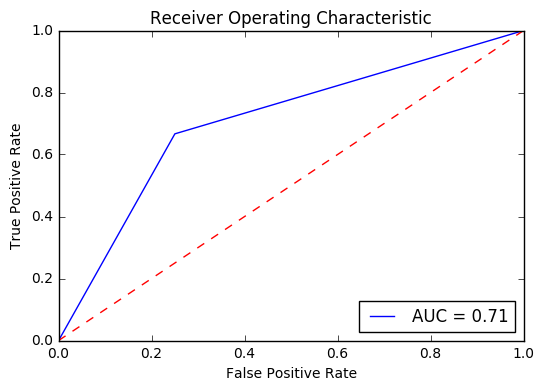

In [85]:
fpr, tpr, thresholds = roc_curve(y,y_pred)
roc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {:0.2f}'.format( roc_auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()